Roy Kyung In Oh 

Nathan Shack 

Camila Dal Bello

Adam Changjiang Dong 


# Social media posts from high profile people and stock prices.

## Introduction

In the past few years, the method of how information is spread has shifted dramatically. The rise of social media platforms has not only changed how individuals communicate but has also created new way for financial influence. In a world increasingly interconnected, social media posts from influential people can traverse the globe instantaneously, reaching millions of followers ready to act upon the insights shared. Prominent celebrities, financial gurus, and politicians often take to platforms like Twitter, currently known as X, to express their opinions, which can range from casual commentary to significant announcements. The weight of their words has the potential to cause substantial fluctuations in the stock market.

The phenomenon raises an intriguing question: what relations do tweets from these high-profile individuals have with stock prices? This is not only a question of academic interest but also a practical subject for investors and market analysts. In this analysis, we aim to dig the relationship between social media influence and market movements. By examining datasets of tweets related and from well-known people alongside stock price trajectories, we seek to uncover patterns and correlations.

As we embark on this exploration, we consider the implications of our findings for the future of financial market regulation, the responsibility of influential figures in the public discourse, and the strategies investors might adopt in this new era of information flow.

## Libraries

We install and import all the libraries needed for this project.

In [1]:
!pip install yfinance 
!pip install nltk
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV

# Some libraries I thought we would need to use.
# Please feel free to add more that are needed

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/camila/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We create a function that cleans the content of the tweet, since there are irrelevant information.

In [2]:
# Clean the 'Tweets' column
def clean_tweet(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove special characters, numbers, punctuations
    text = re.sub(r"[^a-zA-Z']", " ", text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

## Cleaning data for Elon Musk

In [3]:
musk_data = pd.read_csv("elonmusk.csv")

Shown below the tweets have emojis, @, and usernames that aren't as useful in our analysis. Hence, we clean it with the function above. 

In [4]:
musk_data.head()

Tweets  Retweets   Likes  \
0                             @PeterSchiff 🤣 thanks       209    7021   
1                             @ZubyMusic Absolutely       755   26737   
2  Dear Twitter Advertisers https://t.co/GMwHmInPAS     55927  356623   
3                                       @BillyM2k 👻       802   19353   
4    Meeting a lot of cool people at Twitter today!      9366  195546   

                  Date  
0  2022-10-27 16:17:39  
1  2022-10-27 13:19:25  
2  2022-10-27 13:08:00  
3  2022-10-27 02:32:48  
4  2022-10-26 21:39:32

We apply the clean_tweet function and also make the data set into lower case for convenience.

In addition, we make a copy of the data set for different uses that will be showcased throughout the project.

In [5]:
musk_data['Date'] = pd.to_datetime(musk_data['Date'])

musk_data['Tweets'] = musk_data['Tweets'].apply(clean_tweet)

musk_data['Tweets'] = musk_data['Tweets'].str.lower()

musk_data.columns = musk_data.columns.str.lower()

musk = musk_data.copy()

musk_data.head()

tweets  retweets   likes  \
0                                         thanks       209    7021   
1                                     absolutely       755   26737   
2                       dear twitter advertisers     55927  356623   
3                                                      802   19353   
4  meeting a lot of cool people at twitter today      9366  195546   

                 date  
0 2022-10-27 16:17:39  
1 2022-10-27 13:19:25  
2 2022-10-27 13:08:00  
3 2022-10-27 02:32:48  
4 2022-10-26 21:39:32

To show an example visualization that our cleaned data can be used, we plot the frequency of tweets over time by months.

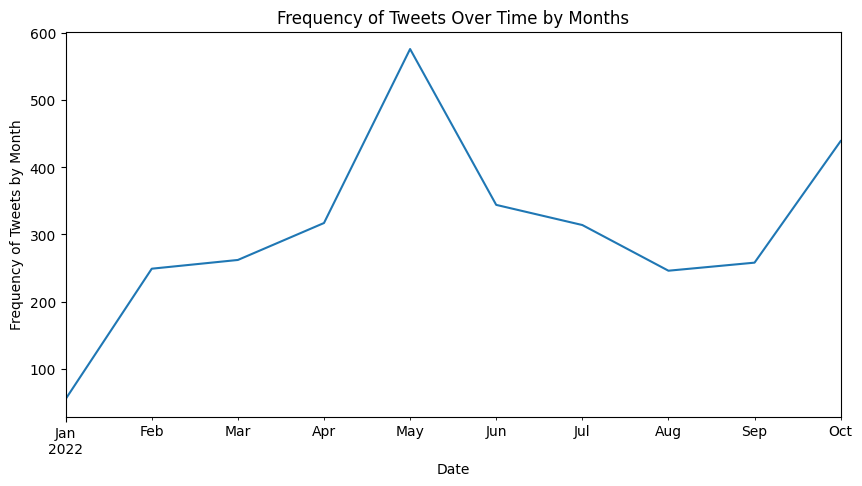

In [6]:
musk_data.set_index('date', inplace=True)

frequency = musk_data.resample('M').size()

plt.figure(figsize=(10,5))
frequency.plot()

plt.xlabel('Date')
plt.ylabel('Frequency of Tweets by Month')
plt.title('Frequency of Tweets Over Time by Months')

plt.show()

## Elon Musk Tweet's impact on Tesla Stock Price

 Let's look at a specific use case of one of Elon Musk's tweets on the change in Tesla's stock price. It is difficult to analyze causation from a single tweet's impact on the stock price, however, there is enough of a significant impact and correlation that it should be referenced. 

On November 6th 2021, Elon Musk tweeted a poll that said "Much is made lately of unrealized gains being a means of tax avoidance, so I propose selling 10% of my Tesla stock. Do you support this?" The tweet had a yes or no poll where his followers could show their "support" in selling his Tesla stock. Elon Musk tweeted this on a Saturday (the stock market was not open). Let's look at how this tweet had an impact on Tesla stock price before and after he tweeted on November 6th. 

In [7]:
# Since November 6, 2021 was a Saturday, we'll look at data from the surrounding days
start_date = "2021-11-04"  # Friday before the tweet
end_date = "2021-11-09"    # Monday after the tweet

tickers = ['TSLA']

df_list = []

for ticker in tickers:
    # Download data for the specified date range
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df = df.reset_index()

# Print the head of the dataframe to check the first few rows
df.head()


[*********************100%%**********************]  1 of 1 completed


Ticker       Date        Open        High         Low       Close  \
0   TSLA 2021-11-04  411.470001  414.496674  405.666656  409.970001   
1   TSLA 2021-11-05  409.333344  413.290009  402.666656  407.363342   
2   TSLA 2021-11-08  383.263336  399.000000  377.666656  387.646667   

    Adj Close     Volume  
0  409.970001   76192200  
1  407.363342   64886400  
2  387.646667  100337100

Here we can see that stock price was around 407 dollars a share on November 5th(before tweet) and 388 dollars a share on November 8th(after tweet). We can also see a substantial increase in shares traded per day. This could infer that there is a lot of selling pressure of Tesla stock during this time. 

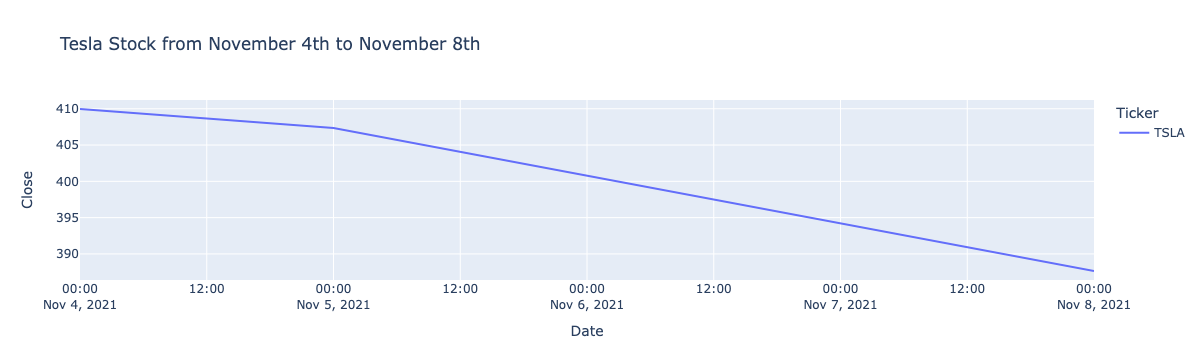

In [8]:
fig = px.line(df, x='Date', 
              y='Close', 
              color='Ticker', 
              title="Tesla Stock from November 4th to November 8th")
fig.show()

It's possible that the decrease in Tesla stock could be due to overall market conditions and not Elon Musk's tweet. We found another stock, Lucid Group, that is highly correlated to Tesla. Lucid Group is an American manufacturer of luxury electric vehicles which is the same market as Tesla. Let's look at the stock price of Lucid during the same time frame of before and after Elon Musk's tweet. 

In [9]:
start_date = "2021-11-04" 
end_date = "2021-11-09" 

tickers = ['LCID']

df_list = []

for ticker in tickers:
    # Download data for the specified date range
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df_lucid = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
df_lucid = df_lucid.reset_index()

# Print the head of the dataframe to check the first few rows
df_lucid.head()


[*********************100%%**********************]  1 of 1 completed


Ticker       Date       Open       High        Low      Close  Adj Close  \
0   LCID 2021-11-04  37.380001  37.700001  36.070000  37.119999  37.119999   
1   LCID 2021-11-05  37.500000  41.919998  36.169998  41.799999  41.799999   
2   LCID 2021-11-08  43.540001  47.869999  43.040001  45.919998  45.919998   

      Volume  
0   40730400  
1  113881100  
2  154195400

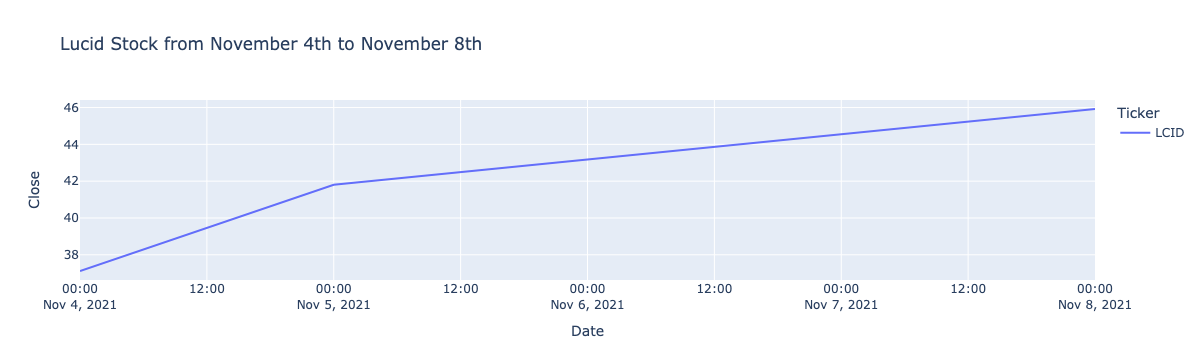

In [10]:
fig = px.line(df_lucid, x='Date', 
              y='Close', 
              color='Ticker', 
              title=" Lucid Stock from November 4th to November 8th")
fig.show()

As we can see, Lucid stock had an almost opposite effect as Tesla. The price increased a substantial amount from before and after Elon Musk's tweet. Next, let's run a correlation test to see how correlated the two stocks are. We'll run a correlation test for all of 2021 for the sake of simplicity. 

In [11]:
tickers = ['TSLA', 'LCID']


start_date = '2021-01-01'
end_date = '2021-12-31'


data = yf.download(tickers, start=start_date, end=end_date)


closing_prices = data['Close']

correlation_matrix = closing_prices.corr()

correlation_matrix

[*********************100%%**********************]  2 of 2 completed


Ticker      LCID      TSLA
Ticker                    
LCID    1.000000  0.681639
TSLA    0.681639  1.000000

Therefore, the two stocks are usually positively correlated so it is strange that two stocks move in opposite directions from November 5th to 8th. Let's create a visualization to show the movement clearer. 

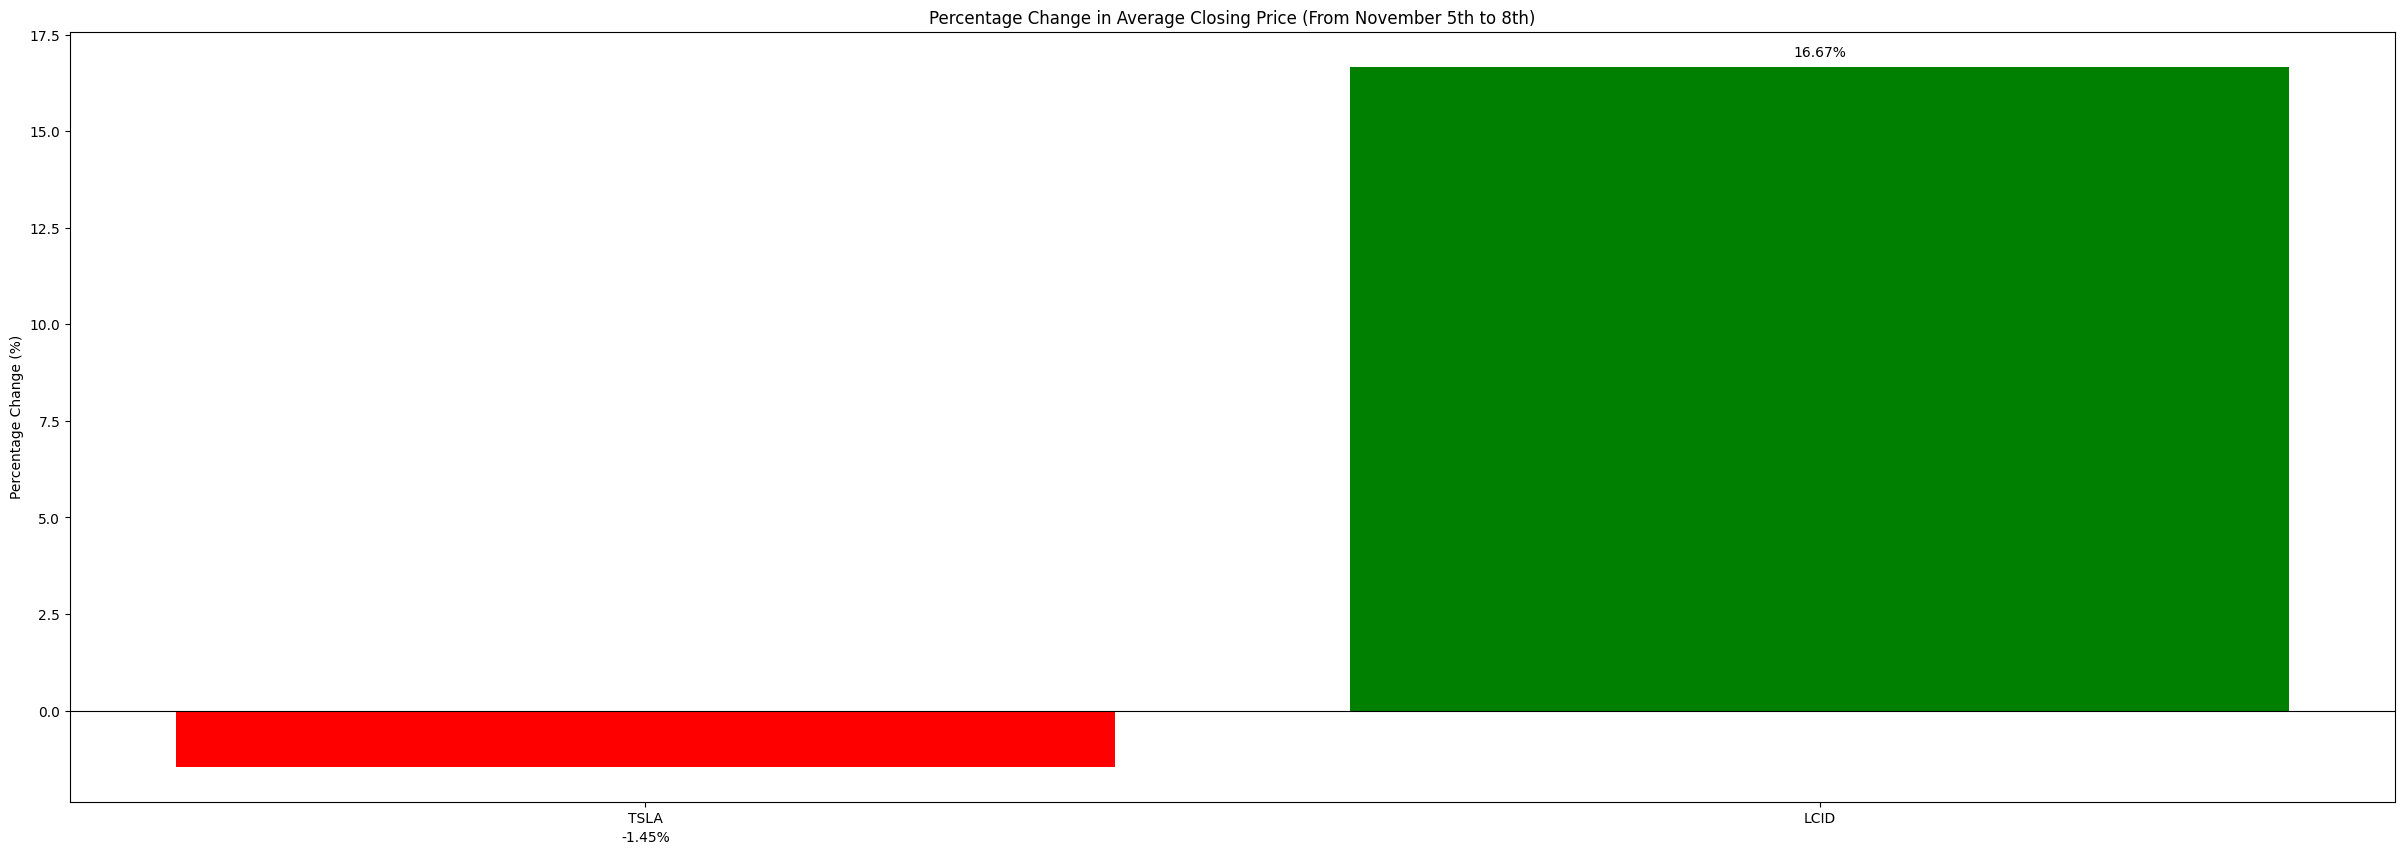

In [12]:

avg_price_before_tsla = 1033.42
avg_price_after_tsla = 1018.43
avg_price_before_lcid = 39.36
avg_price_after_lcid = 45.92

percent_change_tsla = ((avg_price_after_tsla - avg_price_before_tsla) / avg_price_before_tsla) * 100
percent_change_lcid = ((avg_price_after_lcid - avg_price_before_lcid) / avg_price_before_lcid) * 100


companies = ['TSLA', 'LCID']
percent_changes = [percent_change_tsla, percent_change_lcid]

plt.figure(figsize=(30, 10))
plt.bar(companies, percent_changes, color=['red', 'green'])
plt.title('Percentage Change in Average Closing Price (From November 5th to 8th)')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='black', linewidth=0.8)

for i, v in enumerate(percent_changes):
    plt.text(i, v + (0.2 if v >= 0 else -2), f"{v:.2f}%", ha='center', va='bottom')


plt.show()

## Cleaning data for Donald Trump

Now we explore the data for Donald Trump. We go through the same process as we did for the data for Elon Musk.

In [13]:
trump_data = pd.read_csv("trumptweets.csv")
trump_data.head()

id                                               link  \
0  1698308935  https://twitter.com/realDonaldTrump/status/169...   
1  1701461182  https://twitter.com/realDonaldTrump/status/170...   
2  1737479987  https://twitter.com/realDonaldTrump/status/173...   
3  1741160716  https://twitter.com/realDonaldTrump/status/174...   
4  1773561338  https://twitter.com/realDonaldTrump/status/177...   

                                             content                 date  \
0  Be sure to tune in and watch Donald Trump on L...  2009-05-04 20:54:25   
1  Donald Trump will be appearing on The View tom...  2009-05-05 03:00:10   
2  Donald Trump reads Top Ten Financial Tips on L...  2009-05-08 15:38:08   
3  New Blog Post: Celebrity Apprentice Finale and...  2009-05-08 22:40:15   
4  "My persona will never be that of a wallflower...  2009-05-12 16:07:28   

   retweets  favorites mentions hashtags  geo  
0       500        868      NaN      NaN  NaN  
1        33        273      NaN      NaN  NaN  
2        12         18      NaN      NaN  NaN  
3        11         24      NaN      NaN  NaN  
4      1399       1965      NaN      NaN  NaN

We match the columns and the names of the columns for persistence.

In [14]:
trump_data['date'] = pd.to_datetime(trump_data['date'])

trump_data['content'] = trump_data['content'].apply(clean_tweet)

trump_data.rename(columns={'content': 'tweets', 'favorites': 'likes'}, inplace=True)

trump_data = trump_data[['tweets', 'retweets', 'likes', 'date']]

trump = trump_data.copy()

trump_data.head()

tweets  retweets  likes  \
0  Be sure to tune in and watch Donald Trump on L...       500    868   
1  Donald Trump will be appearing on The View tom...        33    273   
2  Donald Trump reads Top Ten Financial Tips on L...        12     18   
3  New Blog Post Celebrity Apprentice Finale and ...        11     24   
4  My persona will never be that of a wallflower ...      1399   1965   

                 date  
0 2009-05-04 20:54:25  
1 2009-05-05 03:00:10  
2 2009-05-08 15:38:08  
3 2009-05-08 22:40:15  
4 2009-05-12 16:07:28

In [15]:
trump_data['likes'].max()

857678

This time for an example visualization, we plot the monthly amount of likes by time. 

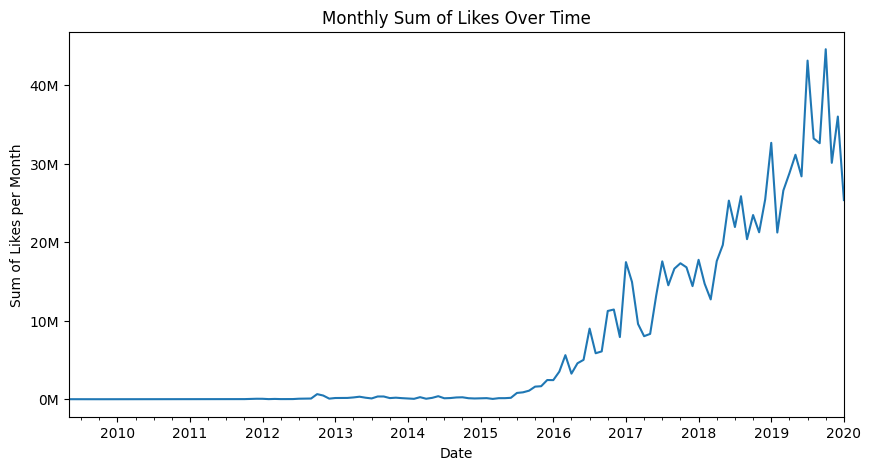

In [16]:
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

trump_data.set_index('date', inplace=True)

likes_per_month = trump_data['likes'].resample('M').sum()

plt.figure(figsize=(10,5))
likes_per_month.plot()

plt.xlabel('Date')
plt.ylabel('Sum of Likes per Month')
plt.title('Monthly Sum of Likes Over Time')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()

Now that we have cleaned the data and observed some visualizations, we present the stock and its history that are related to each person.

Since our data date range for Donald Trump does not coincide with Trump Media, we use the S&P 500 index as a proxy for a stock related to Trump.

In [17]:
musk_recent_date = musk['date'].max()
musk_oldest_date = musk['date'].min()

trump_recent_date = trump['date'].max()
trump_oldest_date = trump['date'].min()

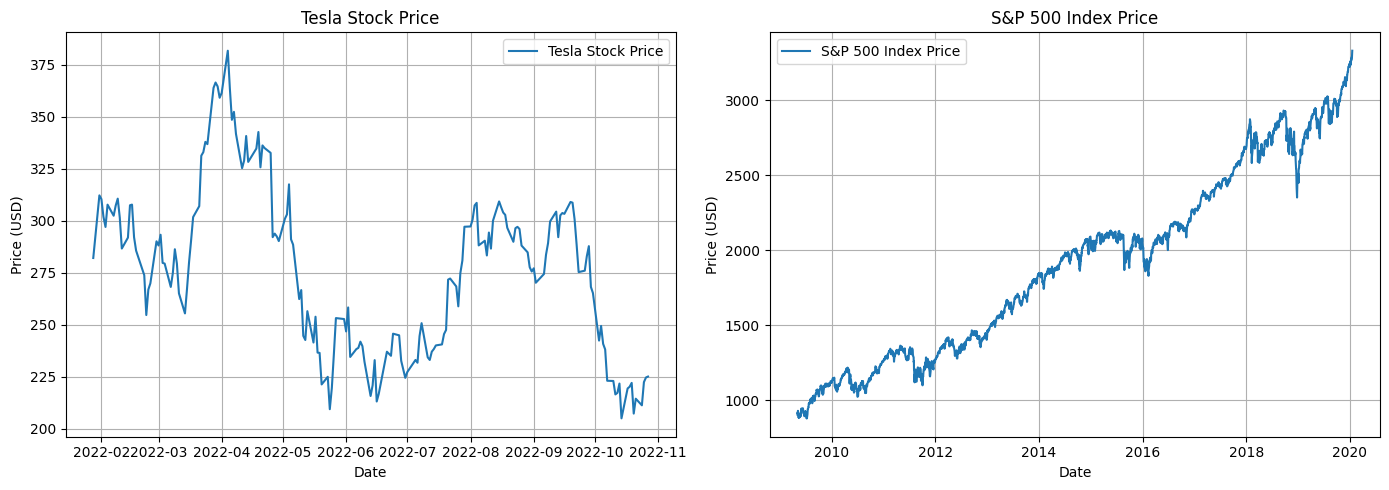

In [18]:
musk_ticker = 'TSLA'  # Tesla for Elon Musk
trump_ticker = '^GSPC'  # S&P 500 for Donald Trump

musk_data = yf.Ticker(musk_ticker)
trump_data = yf.Ticker(trump_ticker)

# Get the historical closing prices
musk_df = musk_data.history(period='1d', start=musk_oldest_date, end=musk_recent_date)
trump_df = trump_data.history(period='1d', start=trump_oldest_date, end=trump_recent_date)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Tesla (Elon Musk) Plot
axes[0].plot(musk_df['Close'], label='Tesla Stock Price')
axes[0].set_title('Tesla Stock Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid()

# S&P 500 (Donald Trump) Plot
axes[1].plot(trump_df['Close'], label='S&P 500 Index Price')
axes[1].set_title('S&P 500 Index Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price (USD)')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


The range of S&P 500 looks too wide, making it difficult to observe the volatility and impacts. Moreover, we believe it would be a better proxy if Trump had a higher influence on the index. Hence, we shorten the range that coincides with Trump's serving years as the president of the United States. (2017 - 2021)

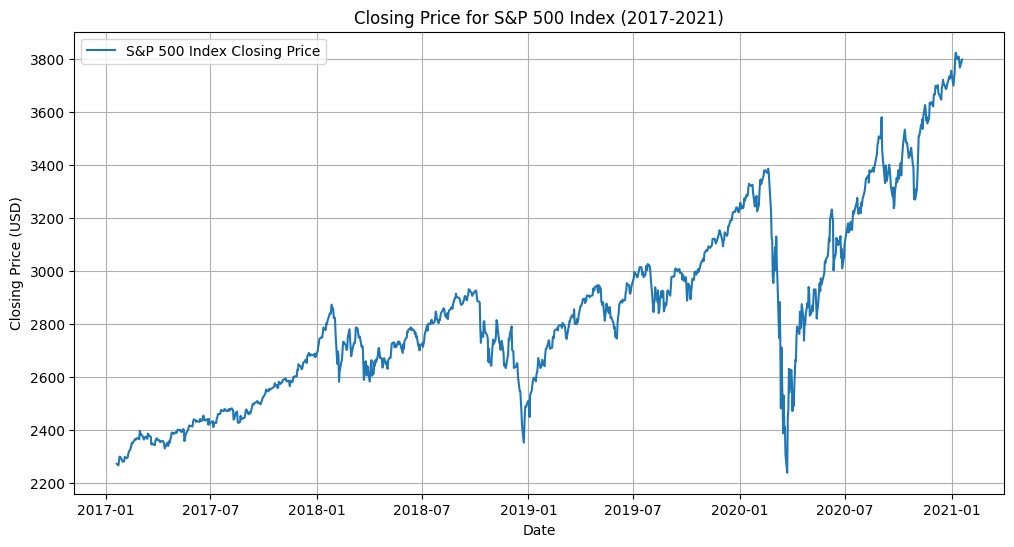

In [19]:
trump_ticker = '^GSPC'
trump_data = yf.Ticker(trump_ticker)
trump_df = trump_data.history(period='1d', start='2017-01-20', end='2021-01-20')

# S&P 500 Plot
plt.figure(figsize=(12, 6))
plt.plot(trump_df.index, trump_df['Close'], label='S&P 500 Index Closing Price')
plt.title('Closing Price for S&P 500 Index (2017-2021)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## Exploratory Analysis

Now that we have successfully imported the data we need, we resume by doing some exploratory analysis.

We thought that the context of the tweet would have the largest impact on the stock. Therefore, we add an extra variable: sentiment. By using the natural language tool kit, it can measure the positivity and negativity of the words from the tweet and normalizes the range between -1 and 1. We also train the analyzer with financial market related words by giving high values since they would have a higher correlation within the context of our project.

If a certain word is neutral or not included in the analyzer's lexicon it results a 0 in sentiment level.

In [20]:
sia = SentimentIntensityAnalyzer()

new_words = {
    'tesla': 4.0, 'S&P': 4.0, 'buy': 4.0, 'sell': -4.0, 'crash': -3.0,
    'bearish': -3.0, 'bullish': 3.0, 'profitable': 2.5, 'loss': -2.5, 
    'gain': 2.5, 'growth': 2.0, 'decline': -2.0, 'rally': 2.5, 'risk': -2.0
}

sia.lexicon.update(new_words)

musk['sentiment'] = musk['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])
trump['sentiment'] = trump['tweets'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [21]:
musk.head()

tweets  retweets   likes  \
0                                         thanks       209    7021   
1                                     absolutely       755   26737   
2                       dear twitter advertisers     55927  356623   
3                                                      802   19353   
4  meeting a lot of cool people at twitter today      9366  195546   

                 date  sentiment  
0 2022-10-27 16:17:39     0.4404  
1 2022-10-27 13:19:25     0.0000  
2 2022-10-27 13:08:00     0.3818  
3 2022-10-27 02:32:48     0.0000  
4 2022-10-26 21:39:32     0.3182

In [22]:
trump.head()

tweets  retweets  likes  \
0  Be sure to tune in and watch Donald Trump on L...       500    868   
1  Donald Trump will be appearing on The View tom...        33    273   
2  Donald Trump reads Top Ten Financial Tips on L...        12     18   
3  New Blog Post Celebrity Apprentice Finale and ...        11     24   
4  My persona will never be that of a wallflower ...      1399   1965   

                 date  sentiment  
0 2009-05-04 20:54:25     0.4767  
1 2009-05-05 03:00:10     0.7506  
2 2009-05-08 15:38:08     0.6115  
3 2009-05-08 22:40:15     0.0000  
4 2009-05-12 16:07:28     0.0000

First, we explore by searching correlation with sentiment level and the change in stock prices. We would like to see if positive tweets result upwardly in stock prices. 

We will plot the sentiment level with the percentage change in stock price. But because the daily level is extremely noisy we smooth our data by applying a rolling average of 7 day window. We also expect that rolling would capture some delayed effect of the impact of the tweet.  

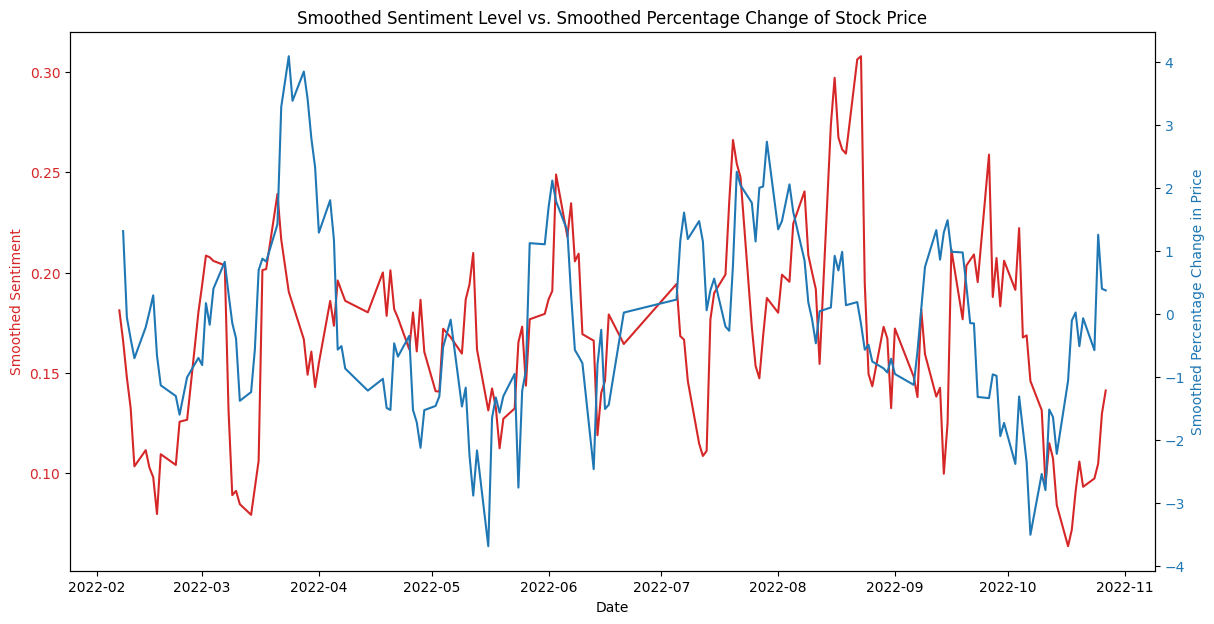

Correlation between smoothed sentiment and smoothed stock price: 0.22318472022731434


In [23]:
musk_ticker = 'TSLA' 

musk_data = yf.Ticker(musk_ticker)

musk_df = musk_data.history(period='1d', start=musk_oldest_date, end=musk_recent_date)

musk_df.reset_index(inplace=True)

musk_df['Date'] = musk_df['Date'].dt.tz_localize(None)

musk['date'] = musk['date'].dt.normalize()

# Since there are several tweets for a single day we compute the daily mean for the sentiment score. 
daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

combined_data = pd.merge(daily_average_sentiment, musk_df, left_on='date', right_on='Date', how='inner')

# Created a copy because it had the same variable name which changed the results in Random Forest Model
musk_combined = combined_data.copy()

musk_combined['pct_change_price'] = musk_combined['Close'].pct_change() * 100

# Apply a rolling average (e.g., over a 7-day window)
musk_combined['sentiment_smoothed'] = musk_combined['sentiment'].rolling(window=7).mean()
musk_combined['pct_change_smoothed'] = musk_combined['pct_change_price'].rolling(window=7).mean()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Smoothed Sentiment', color=color)
ax1.plot(musk_combined['Date'], musk_combined['sentiment_smoothed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Smoothed Percentage Change in Price', color=color)
ax2.plot(musk_combined['Date'], musk_combined['pct_change_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Smoothed Sentiment Level vs. Smoothed Percentage Change of Stock Price')
plt.show()

correlation_smoothed = musk_combined['sentiment_smoothed'].corr(musk_combined['pct_change_smoothed'])
print(f"Correlation between smoothed sentiment and smoothed stock price: {correlation_smoothed}")

In [24]:
trump_ticker = '^GSPC' 

trump_data = yf.Ticker(trump_ticker)

trump_df = trump_data.history(period='1d', start='2017-01-20', end='2021-01-20')

trump_df.reset_index(inplace=True)

trump_df['Date'] = trump_df['Date'].dt.tz_localize(None)

mask_trump = (trump['date'] >= '2017-01-20') & (trump['date'] <= '2021-01-20')
filtered_trump = trump.loc[mask_trump]
new_trump = filtered_trump.copy()
new_trump['date'] = new_trump['date'].dt.normalize()

The code above is used in future cells, hence we keep it alone. 

The code below is a shortened range version that matches the range of Musk's range which is one year. We have selected a single year from Trump's serving years. (2018)

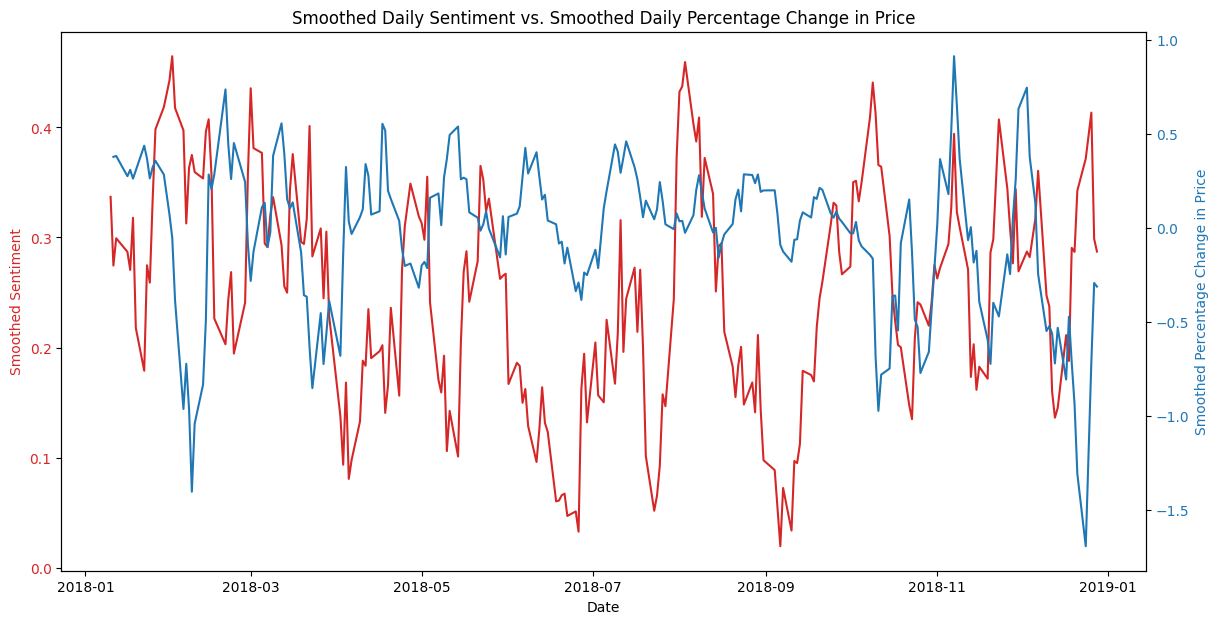

Correlation between smoothed daily sentiment and smoothed daily percentage change in price: -0.18287115402078152


In [25]:
trump_df_short = trump_data.history(period='1d', start='2018-01-01', end='2018-12-31')
trump_df_short.reset_index(inplace=True)
trump_df_short['Date'] = trump_df_short['Date'].dt.tz_localize(None)
mask_trump_short = (trump['date'] >= '2018-01-01') & (trump['date'] <= '2018-12-31')
filtered_trump_short = trump.loc[mask_trump_short]
new_trump_short = filtered_trump_short.copy()

new_trump_short['date'] = new_trump_short['date'].dt.normalize()

trump_daily_average_sentiment_short = new_trump_short.groupby('date')['sentiment'].mean().reset_index()

trump_combined_data_short = pd.merge(trump_daily_average_sentiment_short, trump_df, left_on='date', right_on='Date', how='inner')

# Created a copy because it had the same variable name which changed the results in Random Forest Model
trump_combined = trump_combined_data_short.copy()

trump_combined['pct_change_price'] = trump_combined['Close'].pct_change() * 100

# Apply a rolling average (e.g., over a 7-day window) to smooth the data
trump_combined['sentiment_smoothed'] = trump_combined['sentiment'].rolling(window=7).mean()
trump_combined['pct_change_smoothed'] = trump_combined['pct_change_price'].rolling(window=7).mean()

fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Smoothed Sentiment', color=color)
ax1.plot(trump_combined['Date'], trump_combined['sentiment_smoothed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Smoothed Percentage Change in Price', color=color)
ax2.plot(trump_combined['Date'], trump_combined['pct_change_smoothed'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Smoothed Daily Sentiment vs. Smoothed Daily Percentage Change in Price')
plt.show()

correlation_smoothed = trump_combined['sentiment_smoothed'].corr(trump_combined['pct_change_smoothed'])
print(f"Correlation between smoothed daily sentiment and smoothed daily percentage change in price: {correlation_smoothed}")

#### Results

The correlation for sentiment level and percentage change in stock price for Tesla is 0.2231 indicating that is has a weak positive correlation.

On the other hand, S&P 500 has a weak negative correlation of -0.1828. 

It is quite interesting that the correlation is contrasting among the two people. 

To delve deeper, we will use variables (amount of tweets, sum of retweets, sum of likes, and sentiment) to plot linear regression graphs. 

In [26]:
#TRUMP
trump_daily_average_sentiment = new_trump.groupby('date')['sentiment'].mean().reset_index()

daily_sum_retweets = new_trump.groupby('date')['retweets'].sum().reset_index()
daily_sum_likes = new_trump.groupby('date')['likes'].sum().reset_index()
daily_amount_tweets = new_trump.groupby('date')['tweets'].count().reset_index()

daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date').merge(daily_amount_tweets, on='date')

daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes', 'tweets' : 'count_tweets'}, inplace=True)

trump_combined_data = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')

trump_combined_data.drop('Date', axis=1, inplace=True)

trump_combined_data.head()

date  sentiment  sum_retweets  sum_likes  count_tweets         Open  \
0 2017-01-20   0.222315        365074    1691506            13  2269.959961   
1 2017-01-23   0.493900         23078     160287             1  2267.780029   
2 2017-01-24   0.243825         74683     446020             4  2267.879883   
3 2017-01-25   0.137838        204627     991265             8  2288.879883   
4 2017-01-26  -0.021375        136428     699253             8  2298.629883   

          High          Low        Close      Volume  Dividends  Stock Splits  
0  2276.959961  2265.010010  2271.310059  3536850000        0.0           0.0  
1  2271.780029  2257.020020  2265.199951  3155240000        0.0           0.0  
2  2284.629883  2266.679932  2280.070068  3816950000        0.0           0.0  
3  2299.550049  2288.879883  2298.370117  3849340000        0.0           0.0  
4  2300.989990  2294.080078  2296.679932  3611510000        0.0           0.0

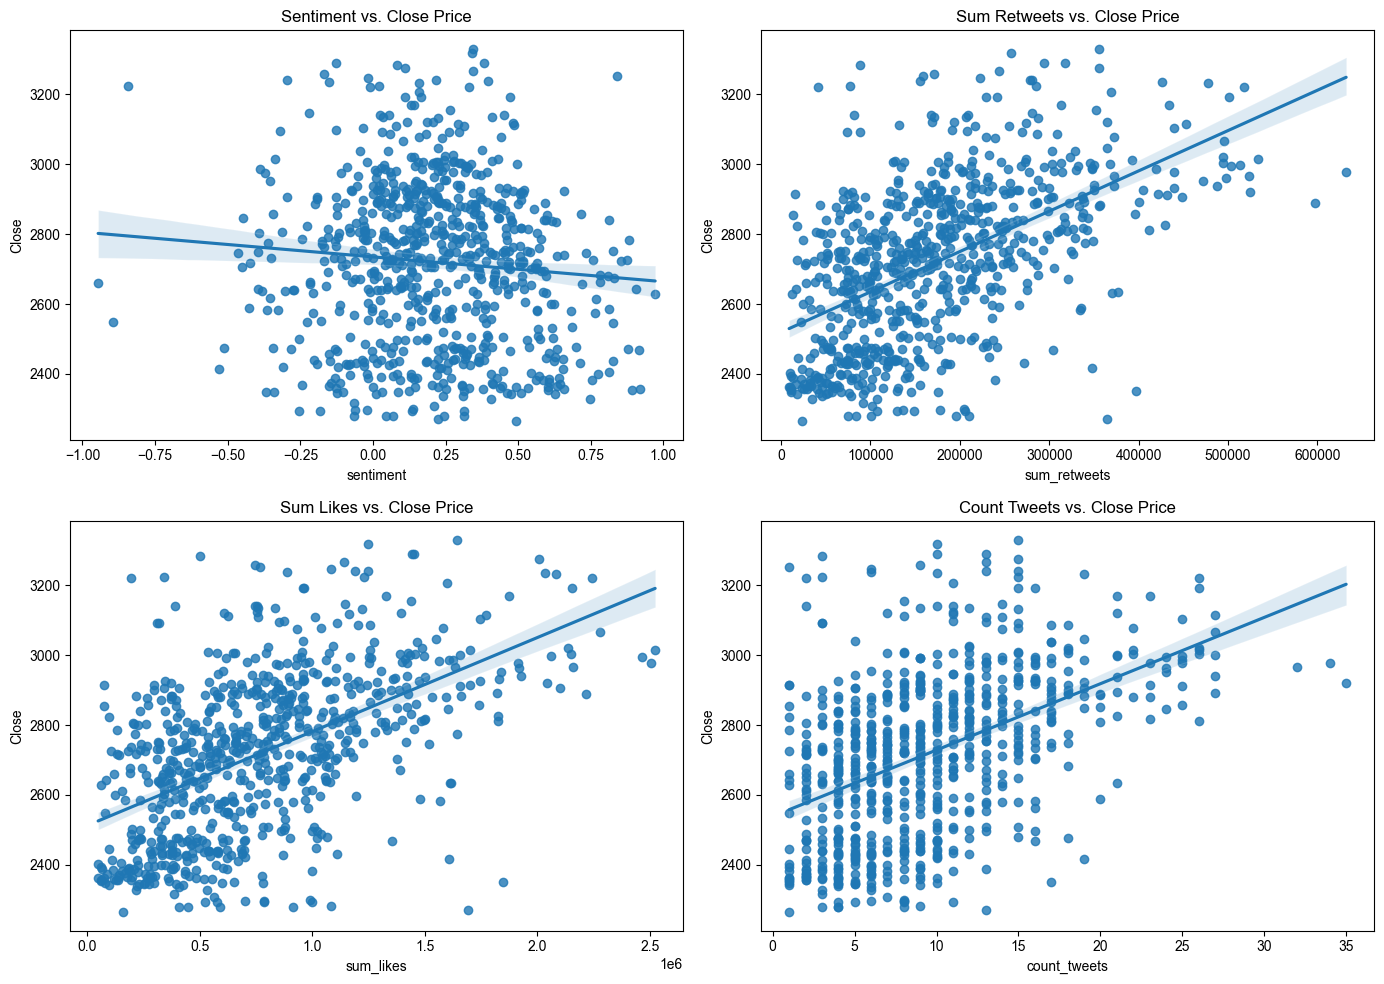

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# Sentiment vs. Close Price
sns.regplot(x='sentiment', y='Close', data=trump_combined_data, ax=axs[0, 0])
axs[0, 0].set_title('Sentiment vs. Close Price')

# Sum Retweets vs. Close Price
sns.regplot(x='sum_retweets', y='Close', data=trump_combined_data, ax=axs[0, 1])
axs[0, 1].set_title('Sum Retweets vs. Close Price')

# Sum Likes vs. Close Price
sns.regplot(x='sum_likes', y='Close', data=trump_combined_data, ax=axs[1, 0])
axs[1, 0].set_title('Sum Likes vs. Close Price')

# Count Tweet vs. Close Price
sns.regplot(x='count_tweets', y='Close', data=trump_combined_data, ax=axs[1, 1])
axs[1, 1].set_title('Count Tweets vs. Close Price')

# Adjust the layout
plt.tight_layout()
plt.show()

In [28]:
#MUSK
musk_daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

musk_daily_sum_retweets = musk.groupby('date')['retweets'].sum().reset_index()
musk_daily_sum_likes = musk.groupby('date')['likes'].sum().reset_index()
musk_daily_amount_tweets = musk.groupby('date')['tweets'].count().reset_index()

musk_daily_metrics = musk_daily_average_sentiment.merge(musk_daily_sum_retweets, on='date').merge(musk_daily_sum_likes, on='date').merge(musk_daily_amount_tweets, on='date')

musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes', 'tweets' : 'count_tweets'}, inplace=True)

musk_combined_data = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')

musk_combined_data.drop('Date', axis=1, inplace=True)

musk_combined_data.head()

date  sentiment  sum_retweets  sum_likes  count_tweets        Open  \
0 2022-01-28   0.338110         14290     216175            10  277.186676   
1 2022-01-31   0.093438         57510     515787             8  290.903320   
2 2022-02-01   0.254744          3731      70542             9  311.736664   
3 2022-02-02   0.306282         16675     299792            11  309.393341   
4 2022-02-03   0.157183         18641     213255            12  294.000000   

         High         Low       Close     Volume  Dividends  Stock Splits  
0  285.833344  264.003326  282.116669  134789100        0.0           0.0  
1  312.663330  287.350006  312.239990  104436000        0.0           0.0  
2  314.566681  301.666656  310.416656   73138200        0.0           0.0  
3  310.500000  296.470001  301.886658   66792900        0.0           0.0  
4  312.333344  293.506653  297.046661   78855600        0.0           0.0

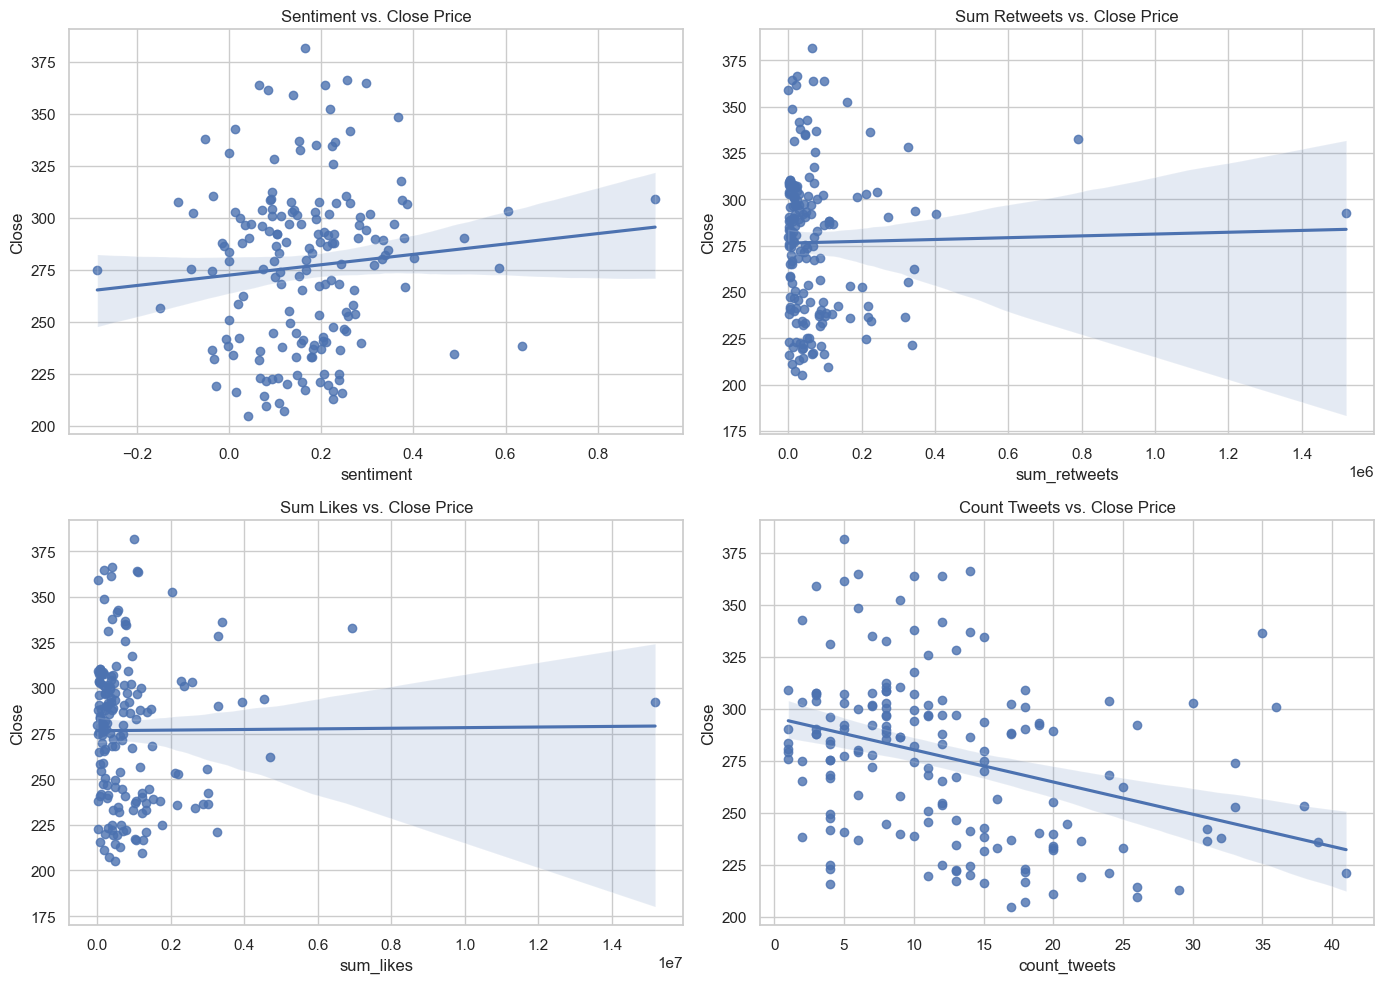

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
sns.set(style="whitegrid")

# Sentiment vs. Close Price
sns.regplot(x='sentiment', y='Close', data=musk_combined_data, ax=axs[0, 0])
axs[0, 0].set_title('Sentiment vs. Close Price')

# Sum Retweets vs. Close Price
sns.regplot(x='sum_retweets', y='Close', data=musk_combined_data, ax=axs[0, 1])
axs[0, 1].set_title('Sum Retweets vs. Close Price')

# Sum Likes vs. Close Price
sns.regplot(x='sum_likes', y='Close', data=musk_combined_data, ax=axs[1, 0])
axs[1, 0].set_title('Sum Likes vs. Close Price')

# Count Tweet vs. Close Price
sns.regplot(x='count_tweets', y='Close', data=musk_combined_data, ax=axs[1, 1])
axs[1, 1].set_title('Count Tweets vs. Close Price')

# Adjust the layout
plt.tight_layout()
plt.show()


## **Random Forest Model**
We would like to use a predictive model to understand the impact that of  social media posts from high profile people on stock market performance.
Studying the impact of tweets from influential figures like Elon Musk and Donald Trump on stock prices is increasingly important for several reasons, reflecting the intersection of social media, public perception, and financial markets. Understanding this dynamic is crucial for market participants who need to gauge the potential impact of social media on financial markets. Furthermore, traders and investors can refine their strategies by understanding how and to what extent social media influences stock prices.

To do this, we opt for the Random Forest Model due to some factors. Firstly, Random Forest is a powerful machine learning algorithm that handlies complex datasets with intricate relationships between features. Stock prices and their movements are influenced by a myriad of factors, including market sentiment, investor perceptions, and external events, often in non-linear ways. Random Forest can capture these complex, non-linear interactions between tweet characteristics (like sentiment, engagement metrics) and stock price movements without the need for extensive feature engineering or transformation. The model also reduces the risk for over-fitting, on top of providing straightforward metrics for evaluating the importance of each feature in making predictions.

At this point in time, we opt to build one model that aggregates the two high-profile individuals and their potential influence on stock prices. A single model can provide insights into the general impact of high-profile tweets on stock prices, applicable beyond just the two individuals.

Cleaning Steps:
1. Calculating average daily sentiment, sum of retweets and sum of likes per day for both individuals.
2. Normalizing the numerical variables 'sentiment', 'sum_retweets', 'sum_likes', 'Perc_Change' using MinMaxScaler() to improve performance and training stability of the model.
3. Binary enconding the variable 'source; that takes value of 'Elon Musk' and 'Donald Trump'
4. Calculating percentage change on daily closing stock prices.
5. Combining both sets.

In [30]:
#TRUMP
#daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()
trump_daily_average_sentiment = new_trump.groupby('date')['sentiment'].mean().reset_index()

# Calculate the daily sum for retweets and likes
daily_sum_retweets = new_trump.groupby('date')['retweets'].sum().reset_index()
daily_sum_likes = new_trump.groupby('date')['likes'].sum().reset_index()

# Merge the daily metrics into a single DataFrame
daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date')

# Renaming the columns to reflect that retweets and likes are sums
daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)

trump_combined_data = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')

# Optionally, drop the extra 'Date' column from the stock price dataset if it's redundant
trump_combined_data.drop('Date', axis=1, inplace=True)

# Getting target outcome: pct change
trump_combined_data['Perc_Change'] = trump_combined_data['Close'].pct_change() * 100


columns_to_normalize = ['sentiment', 'sum_retweets', 'sum_likes', 'Perc_Change']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Replace NaN values in the DataFrame with the mean of their respective columns before normalization
# This step is important because scaling does not work with NaN values
for column in columns_to_normalize:
    trump_combined_data[column] = trump_combined_data[column].fillna(trump_combined_data[column].mean())

    
# Fit and transform the selected columns with the scaler
trump_combined_data[columns_to_normalize] = scaler.fit_transform(trump_combined_data[columns_to_normalize])

In [31]:
#MUSK
musk_daily_average_sentiment = musk.groupby('date')['sentiment'].mean().reset_index()

# Calculate the daily sum for retweets and likes
musk_daily_sum_retweets = musk.groupby('date')['retweets'].sum().reset_index()
musk_daily_sum_likes = musk.groupby('date')['likes'].sum().reset_index()

# Merge the daily metrics into a single DataFrame
musk_daily_metrics = musk_daily_average_sentiment.merge(musk_daily_sum_retweets, on='date').merge(musk_daily_sum_likes, on='date')

# Renaming the columns to reflect that retweets and likes are sums
musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)

musk_combined_data = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')

# Drop the extra 'Date' column from the stock price dataset if it's redundant
musk_combined_data.drop('Date', axis=1, inplace=True)

# Getting target outcome: pct change
musk_combined_data['Perc_Change'] = musk_combined_data['Close'].pct_change() * 100

#Storing DF Without normalization
musk_data_total2 = musk_combined_data

columns_to_normalize = ['sentiment', 'sum_retweets', 'sum_likes', 'Perc_Change']

# Initialize the Min-Max Scaler
scaler = MinMaxScaler()

# Replace NaN values in the DataFrame with the mean of their respective columns before normalization
# This step is important because scaling does not work with NaN values
for column in columns_to_normalize:
    musk_combined_data[column] = musk_combined_data[column].fillna(musk_combined_data[column].mean())

# Fit and transform the selected columns with the scaler
musk_combined_data[columns_to_normalize] = scaler.fit_transform(musk_combined_data[columns_to_normalize])

Modelling steps:

- Defining X variables: sentiment, sum_retweets, sum_likes, source
- Defining Y (outcome) variable: percentage price change
- Splitting into train and test
- Cross Validating and model building in train set
- Predicting in the test set

In [32]:
#Joining the 2 datasets

musk_combined_data['source'] = 'Elon Musk'
trump_combined_data['source'] = 'Donald Trump'
combined_data = pd.concat([musk_combined_data, trump_combined_data], ignore_index=True)
combined_data['source'] = combined_data['source'].replace({'Elon Musk': 1, 'Donald Trump': 0})

Initiating the Random Forest Model

In [33]:
#Random Forest model initiation
X = combined_data[['sentiment', 'sum_retweets', 'sum_likes', 'source']]
y = combined_data['Perc_Change']

#Getting X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#Building model 
#Note that this is a first attempt that still needs tunning. We plan to proceed with hypterparameter tuning.
model = RandomForestRegressor(n_estimators=100, random_state=42)

#Cross validating
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Convert scores to positive 
scores = -scores

# Results
print("MAE scores for each fold:", scores)
print("Average MAE:", scores.mean())
print("Standard Deviation of MAE:", scores.std())

#Training 
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE on the test set:", mae)

importances = model.feature_importances_
# Map these importances to the corresponding feature names and sort them
feature_importances = sorted(zip(importances, X.columns), reverse=True)
#print("Feature importances:", feature_importances)

MAE scores for each fold: [0.16321162 0.0642632  0.05732495 0.07357213 0.09142282]
Average MAE: 0.08995894430458476
Standard Deviation of MAE: 0.038371536822056136
MAE on the test set: 0.07545750098765336


**Hyperparameter tuning**
- Hyperparameter tuning is a crucial part of the machine learning workflow, primarily aimed at optimizing the model to improve its accuracy, efficiency, or prevent overfitting.
- Hyperparameter tuning involves selecting a combination of hyperparameters that yields the best performance from a model.

**Benefits**:
- Improving Model Accuracy: By tuning hyperparameters, you can often significantly improve the performance of a model on new, unseen data.
- Preventing Overfitting: Proper hyperparameter settings can help in controlling overfitting, which is crucial for the model’s ability to generalize.
- Efficiency: Finding the right hyperparameters can make the training process more computationally efficient, speeding up training or requiring less data to train effectively.

GridSearchCV is one method used for hyperparameter tuning. It exhaustively searches through a manually specified subset of the hyperparameter space defined in a param_grid

**Tuning Parameters**:
- n_estimators: This parameter specifies the number of trees in the forest. Generally, a higher number of trees increases the model's performance and makes the predictions more stable, but it also makes your model slower and computationally more expensive.
- max_depth: This parameter controls the maximum depth of each tree. Deeper trees can model more complex patterns by creating more splits and capturing more information about the data. However, setting it too high can lead to overfitting, where the model learns the training data too well, including the noise and fluctuations in the data, which will not generalize well on new data.

In [34]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

#Setting up param_grid
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],  # Number of trees in the forest
    'max_depth': [1, 3, 5, 10, 15, 20]  # Maximum number of levels in each tree
}

# Setup the GridSearchCV with the param_grid
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Retrieve the mean test scores
mean_scores = grid_search.cv_results_['mean_test_score']

# Creating a DataFrame for better visualization and analysis
results_df = pd.DataFrame(grid_search.cv_results_['params'])
results_df['mean_test_score'] = mean_scores

Fitting 5 folds for each of 36 candidates, totalling 180 fits


After performing hyperparameter tuning, it is crucial to understand how they relate to model fitting and overal test scores. To do so, we are creating two plots that demonstrate the mean cv test scores for the two hyperparameters we are tuning. Thus, the first plot relates to 'Performance vs. Number of Estimators', and the second plot relates to 'Performance vs. Max Depth'. Even though we could directly extract the hyperparameters without visualizing them, creating a visualization helps understand how changing the parameters impact model performance overall.

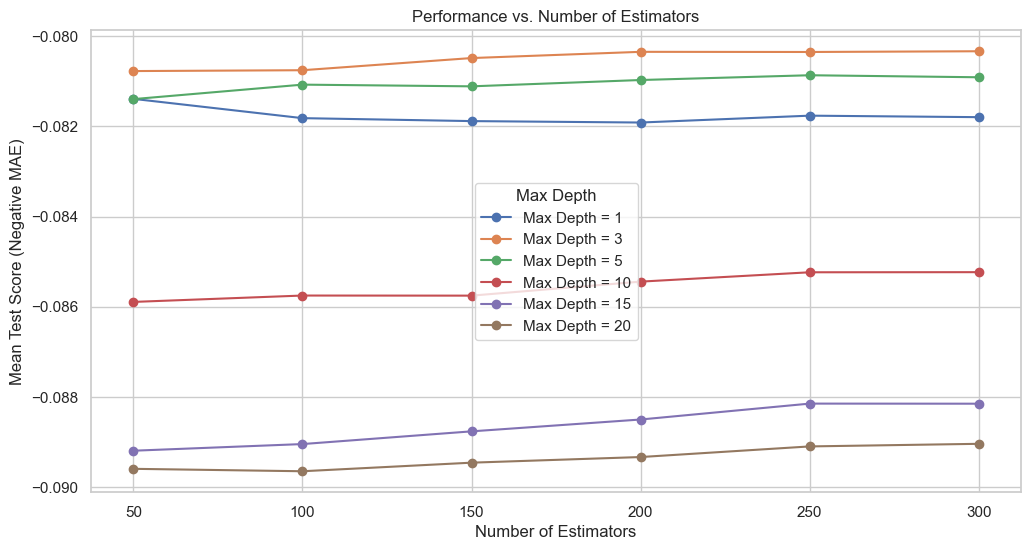

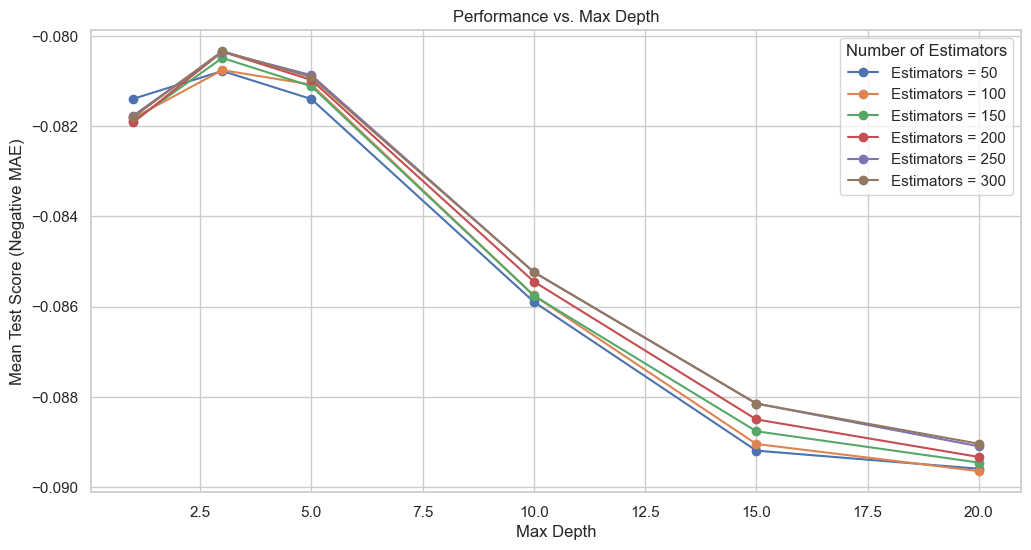

In [35]:
mean_scores = grid_search.cv_results_['mean_test_score']
param_list = grid_search.cv_results_['params']

# Creating a DataFrame for better visualization and analysis
results_df = pd.DataFrame(param_list)
results_df['mean_test_score'] = mean_scores

# Plotting for n_estimators
plt.figure(figsize=(12, 6))
for depth in sorted(results_df['max_depth'].unique()):
    subset = results_df[results_df['max_depth'] == depth]
    plt.plot(subset['n_estimators'], subset['mean_test_score'], marker='o', linestyle='-', label=f'Max Depth = {depth}')

plt.title('Performance vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score (Negative MAE)')
plt.legend(title='Max Depth')
plt.grid(True)
plt.show()

# Plotting for max_depth
plt.figure(figsize=(12, 6))
for n_est in sorted(results_df['n_estimators'].unique()):
    subset = results_df[results_df['n_estimators'] == n_est]
    plt.plot(subset['max_depth'], subset['mean_test_score'], marker='o', linestyle='-', label=f'Estimators = {n_est}')

plt.title('Performance vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score (Negative MAE)')
plt.legend(title='Number of Estimators')
plt.grid(True)
plt.show()

**Interpretation**: 
- 'Performance vs. Number of Estimators': this plot clearly demonstrates a superiority of the 'max depth = 3' parameter. It also indicates that the best performance is achieved around 200 and 300 'number of estimators', however the model shows low sensitivity to the number of estimators.
- 'Performance vs. Max Depth': This graph demonstrates once again that the best performance is achieved when max depth = 3. It also confirms the idea that the number of estimators do not strongly affect the models' performance.

**Best Hyperparameters**:
- The {'max_depth': 3, 'n_estimators': 300} configuration indicates the best settings found for your RandomForest model.
- max_depth of 3: This relatively shallow depth prevents the model from becoming overly complex and overfitting the data, which is particularly important given your model’s context and data characteristics. A depth of 3 suggests that each decision tree in the forest makes only three splits before reaching a prediction.
- n_estimators of 300: This indicates that your model uses 300 trees to make a prediction. A higher number of trees can improve prediction accuracy and model stability because it averages more decision paths, at the cost of increased computational resources and time.

**Following Steps**:
- Following hyperparemeter tunining, it is now important to re-run the model with the best hyperparameter. 

In [36]:
feature_names = X_train.columns

# Use the best estimator found by the grid search
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Calculate the Mean Absolute Error on the test set
mae_test = mean_absolute_error(y_test, y_pred)

# Extract feature importances
importances = best_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

# Optionally, create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': importances[indices]
})

# Display the DataFrame sorted by importance
print(feature_importances_df)

# Print the results
print("Best model parameters:", grid_search.best_params_)
print("Mean Absolute Error on the test set:", mae_test)

Feature ranking:
        Feature  Importance
0  sum_retweets    0.334839
1        source    0.284750
2     sentiment    0.257632
3     sum_likes    0.122779
Best model parameters: {'max_depth': 3, 'n_estimators': 300}
Mean Absolute Error on the test set: 0.06755777619365051


**Interpretation of results:**

The feature ranking indicates how influential each feature is in predicting the target variable. In our RandomForest model, the importance of each feature is quantified as follows:

**sum_retweets:** This is the most influential feature, with an importance score of approximately 0.335. It implies that the number of retweets a post has received is the most predictive of the changes in stock price.

**source:** The second most important feature, with a score of around 0.285. This suggests that the source of the post (whether it comes from Elon Musk or Donald Trump) significantly affects the outcome.

**sentiment:** The third in importance with a score of about 0.258. This feature likely represents an analysis of the mood or tone of the post's content, indicating its substantial role in the model's predictions.

**sum_likes:** The least influential of the listed features but still relevant, with an importance of about 0.123. This shows that while likes are predictive, they are less so compared to the number of retweets or the source of the post.

The MAE value of 0.06755777619365051 is a metric that represents the average magnitude of errors in our predictions, without considering their direction (i.e., whether they are over or underestimations). A lower MAE value indicates better model performance, with 0 being a perfect score. The value achieved suggests that your model predictions are quite close to the actual values, indicating good model performance.

Overall, these results imply that our model is well-tuned and effective at making predictions based on the given data, with a particular emphasis on how engagement metrics like retweets and the contextual factors like source and sentiment play a crucial role in the difference in stock prices.

**Conclusion:**
- 

Our project has unearthed significant insights into the interplay between social media influence and financial market dynamics. We have demonstrated that tweets from high-profile individuals, characterized by their number of retweets, source, and sentiment, have a measurable impact on stock prices. Our analysis, using a RandomForest model, revealed that retweets stand as the most predictive of stock price fluctuations, followed by the identity of the tweet's source and the sentiment expressed within these tweets.

After understanding how the different variables impact stock prices, we can try to better visualize the impact of one's tweets on stock prices. To do this, we create two graphs: 1. one indicating Elon Musk's most afluential tweets (weighted by the weights indicated through the Random Forest model) and how stock prices changed in days prior to the tweet and afterr the tweet, and 2. one indicating Donald Trump's most afluential tweets.

We do this in order to visualize the results of our model and also understand how it performs for the 2 individuals on the dataset. 

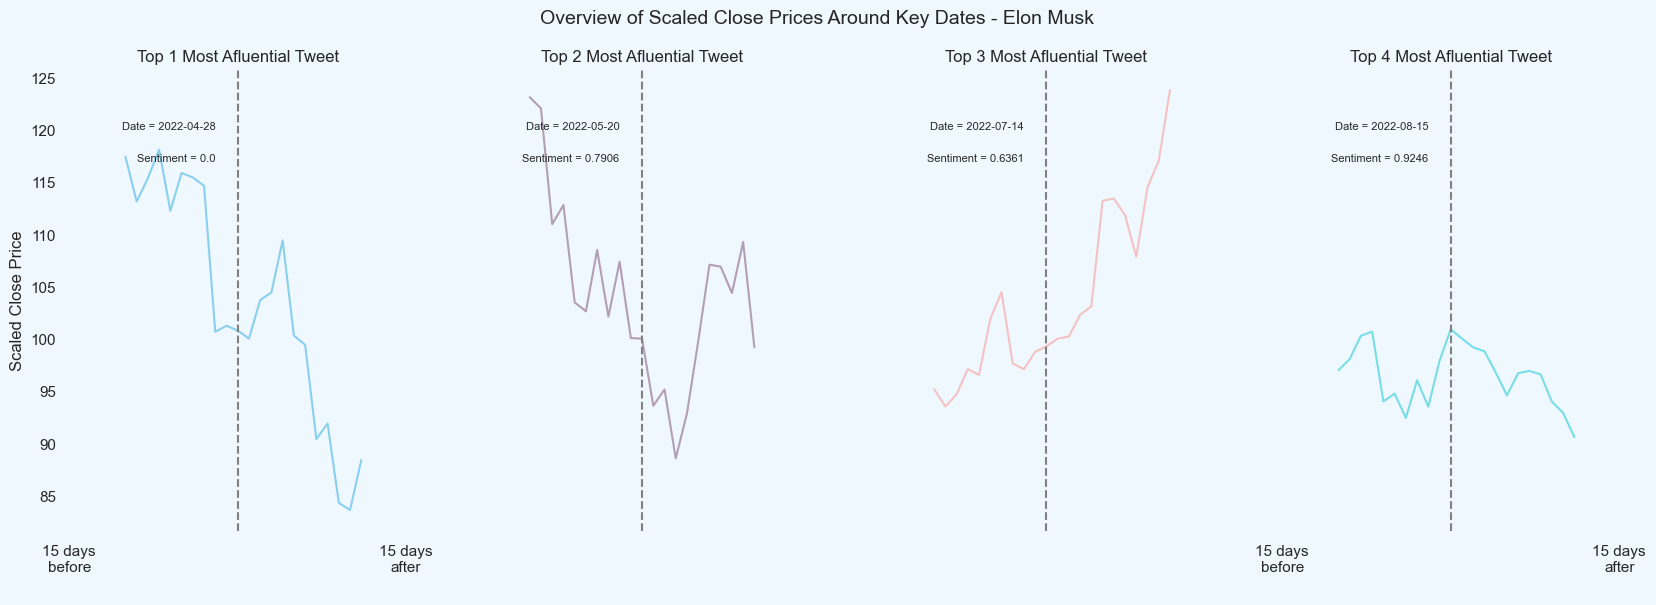

In [68]:
#Musk
musk_daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)
musk_combined_data2 = pd.merge(musk_daily_metrics, musk_df, left_on='date', right_on='Date', how='inner')
musk_combined_data2.drop('Date', axis=1, inplace=True)

# Normalize features using max value for each
scaler = MinMaxScaler()
musk_combined_data2[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    musk_combined_data2[['sum_retweets', 'sum_likes', 'sentiment']]
)


total_weight = 0.335 + 0.123 + 0.258

# Calculate the influence score based on given importance weights
musk_combined_data2['influence_score'] = (
    0.335 * musk_combined_data2['norm_retweets']/ total_weight +
    0.123 * musk_combined_data2['norm_likes']/ total_weight +
    0.258 * musk_combined_data2['norm_sentiment']/ total_weight
)

musk[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    musk[['retweets', 'likes', 'sentiment']]
)

# Calculate the influence score based on given importance weights
musk['influence_score'] = (
    0.335 * musk['norm_retweets']/ total_weight +
    0.123 * musk['norm_likes']/ total_weight +
    0.258 * musk['norm_sentiment']/ total_weight
)

# Select the top N most influential tweets
top_tweets = musk_combined_data2.sort_values(by='influence_score', ascending=False).head(7)
top_dates = top_tweets['date'].unique() 
filtered_tweets = musk[musk['date'].isin(top_dates)]
tweets_musk = filtered_tweets.loc[filtered_tweets.groupby('date')['influence_score'].idxmax()].tail(4)
top_dates = tweets_musk['date']
musk_df = musk_df[['Date', 'Close']]
musk_df['Date'] = pd.to_datetime(musk_df['Date'])

stock_data_around_top_dates = []

for top_date in top_dates:
    # Define the date range
    date_range_start = top_date - pd.Timedelta(days=15)
    date_range_end = top_date + pd.Timedelta(days=15)
    
    # Create a mask to filter rows within the date range
    date_mask = (musk_df['Date'] >= date_range_start) & (musk_df['Date'] <= date_range_end)
    
    # Append the filtered DataFrame to the list
    stock_data_around_top_dates.append(musk_df.loc[date_mask])

# Now 'stock_data_around_top_dates' contains the stock data around each of the top 4 dates

def scale_by_middle(df):
    N = df.shape[0]
    middle_row_value = df.iloc[N // 2]["Close"]
    
    out = (df["Close"] / middle_row_value) * 100
    
    # Adjust the range calculation for even number of rows
    if N % 2 == 0:  # Check if even
        out.index = list(range(-(N//2) + 1, (N//2) + 1))  # Adjust for even length
    else:
        out.index = list(range(-(N//2), (N//2) + 1))
    
    out.name = "DeltaDays"
    return out
    
# Assuming 'stock_data_around_top_dates' is a list of DataFrames where each DataFrame
# corresponds to stock data around a top sentiment date
scaled_data_around_top_dates = [scale_by_middle(df) for df in stock_data_around_top_dates]


fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, sharey=True)
subplot_background_color = '#F0F8FF'  
fig.set_facecolor(subplot_background_color)
line_colors = ['#89CFF0', '#B39EB5', '#F4C2C2', '#77DDE7']  
for ax in axs:
    ax.grid(False) 


# Loop over each Series and plot in a separate subplot
for i, ax in enumerate(axs.flat):
    # Plotting each series
    ax.plot(scaled_data_around_top_dates[i].index, scaled_data_around_top_dates[i].values, color=line_colors[i],  label=f"Top Date {i+1} Series")
    ax.axvline(x=0, color='gray', linestyle='--', label='Middle Date')

    ax.set_xlabel(" ")
    ax.set_title(f"Top {i+1} Most Afluential Tweet")

    #i[i].set_title(f"Top Date {i+1}")
    # Set background color for the subplot interior
    ax.set_facecolor(subplot_background_color)

# Remove border around each subplot
    for direction in ["top", "right", "left", "bottom"]:
        ax.spines[direction].set_visible(False)

    # Set y-axis label for the first subplot
    if i == 0:
        ax.set_ylabel("Scaled Close Price")
    else:
        ax.tick_params(labelleft=False) 

    # turn of tick marks
    ax.tick_params(which="both", left=False, labelbottom=False, right=False)
    ax.set_xticks([-15, 15]) 


# Set a common x-axis label
fig.suptitle('Overview of Scaled Close Prices Around Key Dates - Elon Musk ', fontsize=14)

for ax in axs[[0, 3]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(["15 days\nbefore", "15 days\nafter"])
    
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment("center")
        
df = tweets_musk[['tweets', 'date', 'sentiment']].reset_index(drop=True)
sentiments = list(df['sentiment'])
dates = list(df['date'])
dates= [ts.date() for ts in dates]

for i in range(len(axs)):
    axs[i].annotate(
        f'Sentiment = {sentiments[i]}',
        xy=(0.1, 117), xycoords="data", xytext=(-2, 117),
        annotation_clip=False,
        horizontalalignment="right",
        fontsize=8,
    )

for i in range(len(axs)):
    axs[i].annotate(
        f'Date = {dates[i]}',
        xy=(0.1, 120), xycoords="data", xytext=(-2, 120),
        annotation_clip=False,
        horizontalalignment="right", fontsize=8
    )

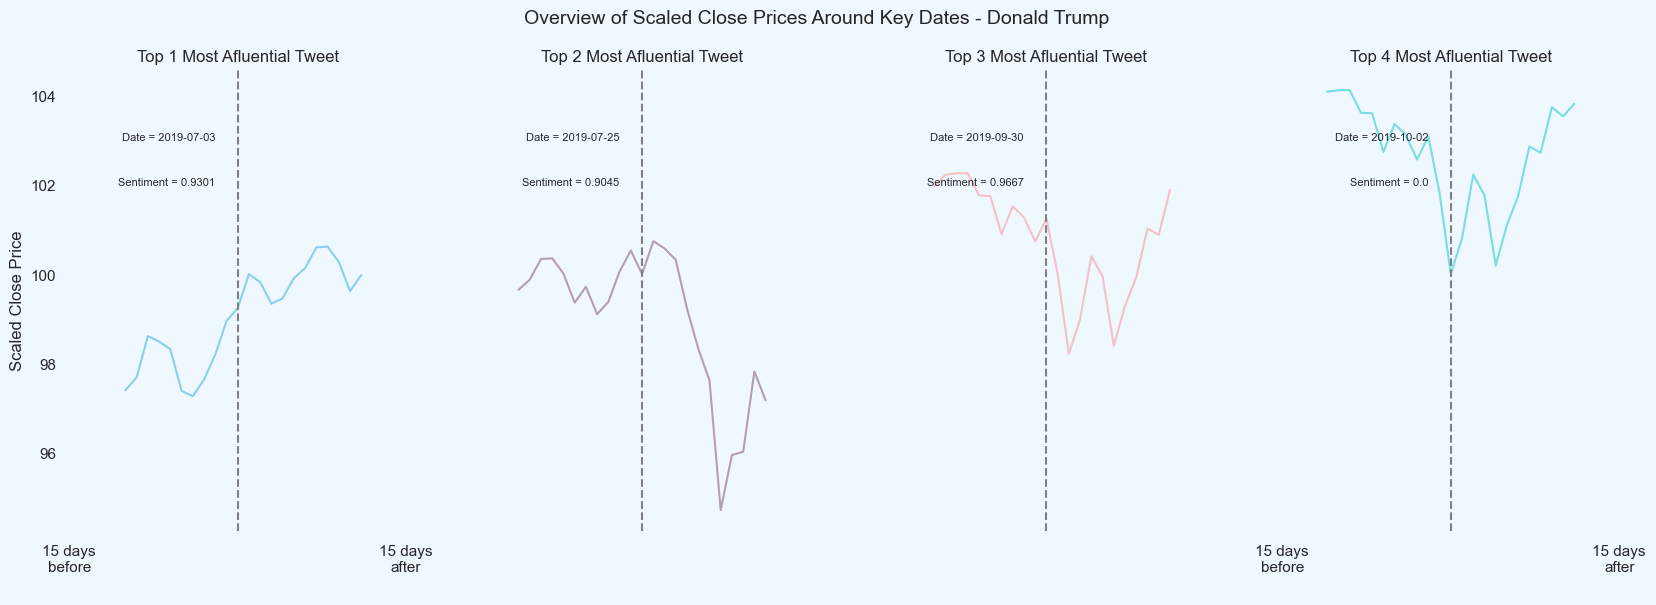

In [67]:
daily_metrics = trump_daily_average_sentiment.merge(daily_sum_retweets, on='date').merge(daily_sum_likes, on='date')
daily_metrics.rename(columns={'retweets': 'sum_retweets', 'likes': 'sum_likes'}, inplace=True)
trump_combined_data2 = pd.merge(daily_metrics, trump_df, left_on='date', right_on='Date', how='inner')
trump_combined_data2.drop('Date', axis=1, inplace=True)

#Creating influence score
from sklearn.preprocessing import StandardScaler

# Normalize features using max value for each
scaler = MinMaxScaler()
trump_combined_data2[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    trump_combined_data2[['sum_retweets', 'sum_likes', 'sentiment']]
)

total_weight = 0.335 + 0.123 + 0.258

# Calculate the influence score based on given importance weights
trump_combined_data2['influence_score'] = (
    0.335 * trump_combined_data2['norm_retweets']/ total_weight +
    0.123 * trump_combined_data2['norm_likes']/ total_weight +
    0.258 * trump_combined_data2['norm_sentiment']/ total_weight
)

trump[['norm_retweets', 'norm_likes', 'norm_sentiment']] = scaler.fit_transform(
    trump[['retweets', 'likes', 'sentiment']]
)

# Calculate the influence score based on given importance weights
trump['influence_score'] = (
    0.335 * trump['norm_retweets']/ total_weight +
    0.123 * trump['norm_likes']/ total_weight +
    0.258 * trump['norm_sentiment']/ total_weight
)

# Select the top N most influential tweets
trump_df['Date'] = trump_df['Date'].dt.tz_localize(None)
trump['date'] = trump['date'].dt.normalize()


top_tweets_trump = trump_combined_data2.sort_values(by='influence_score', ascending=False).head(7)
top_dates_trump = top_tweets_trump['date'].unique() 
filtered_tweets_trump = trump[trump['date'].isin(top_dates_trump)]
tweets_trump = filtered_tweets_trump.loc[filtered_tweets_trump.groupby('date')['influence_score'].idxmax()].head(4)
top_dates_trump = tweets_trump['date']

trump_df = trump_df[['Date', 'Close']]
trump_df['Date'] = pd.to_datetime(trump_df['Date'])



stock_data_around_top_dates = []

for top_date in top_dates_trump:
    # Define the date range
    date_range_start = top_date - pd.Timedelta(days=15)
    date_range_end = top_date + pd.Timedelta(days=15)
    
    # Create a mask to filter rows within the date range
    date_mask = (trump_df['Date'] >= date_range_start) & (trump_df['Date'] <= date_range_end)
    
    # Append the filtered DataFrame to the list
    stock_data_around_top_dates.append(trump_df.loc[date_mask])

# Now 'stock_data_around_top_dates' contains the stock data around each of the top 4 dates

def scale_by_middle(df):
    N = df.shape[0]
    middle_row_value = df.iloc[N // 2]["Close"]
    
    out = (df["Close"] / middle_row_value) * 100
    
    # Adjust the range calculation for even number of rows
    if N % 2 == 0:  # Check if even
        out.index = list(range(-(N//2) + 1, (N//2) + 1))  # Adjust for even length
    else:
        out.index = list(range(-(N//2), (N//2) + 1))
    
    out.name = "DeltaDays"
    return out
    
scaled_data_around_top_dates = [scale_by_middle(df) for df in stock_data_around_top_dates]

fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharex=True, sharey=True)
subplot_background_color = '#F0F8FF'  
fig.set_facecolor(subplot_background_color)
line_colors = ['#89CFF0', '#B39EB5', '#F4C2C2', '#77DDE7']  
for ax in axs:
    ax.grid(False) 


# Loop over each Series and plot in a separate subplot
for i, ax in enumerate(axs.flat):
    # Plotting each series
    ax.plot(scaled_data_around_top_dates[i].index, scaled_data_around_top_dates[i].values, color=line_colors[i],  label=f"Top Date {i+1} Series")
    ax.axvline(x=0, color='gray', linestyle='--', label='Middle Date')

    ax.set_xlabel(" ")
    ax.set_title(f"Top {i+1} Most Afluential Tweet")

    #i[i].set_title(f"Top Date {i+1}")
    # Set background color for the subplot interior
    ax.set_facecolor(subplot_background_color)

# Remove border around each subplot
    for direction in ["top", "right", "left", "bottom"]:
        ax.spines[direction].set_visible(False)

    # Set y-axis label for the first subplot
    if i == 0:
        ax.set_ylabel("Scaled Close Price")
    else:
        ax.tick_params(labelleft=False) 

    # turn of tick marks
    ax.tick_params(which="both", left=False, labelbottom=False, right=False)
    ax.set_xticks([-15, 15]) 


# Set a common x-axis label
fig.suptitle('Overview of Scaled Close Prices Around Key Dates - Donald Trump ', fontsize=14)

for ax in axs[[0, 3]]:
    ax.tick_params(labelbottom=True)
    ax.set_xticklabels(["15 days\nbefore", "15 days\nafter"])
    
    for label in ax.xaxis.get_ticklabels():
        label.set_horizontalalignment("center")
        
df = tweets_trump[['tweets', 'date', 'sentiment']].reset_index(drop=True)
sentiments = list(df['sentiment'])
dates = list(df['date'])
dates= [ts.date() for ts in dates]

for i in range(len(axs)):
    axs[i].annotate(
        f'Sentiment = {sentiments[i]}',
        xy=(0.1, 102), xycoords="data", xytext=(-2, 102),
        annotation_clip=False,
        horizontalalignment="right",
        fontsize=8,
    )

for i in range(len(axs)):
    axs[i].annotate(
        f'Date = {dates[i]}',
        xy=(0.1, 103), xycoords="data", xytext=(-2, 103),
        annotation_clip=False,
        horizontalalignment="right", fontsize=8
    )

For Elon Musk, it looks like for the most afluential tweets, the flow of the closing prices around such dates varies according to what we would expect. That is, for a tweet with a positive sentiment, we would usually expect stock prices to go up. This is true for all dates except the last one. 

For Donald Trump, the visualization does not necessarily corresponds to what we would expect. The relationship between the most affluential tweets and stock prices around such dates is less clear. Still, an argument can be made in favour of the model's results.

This finding underscores the powerful role of social media in shaping financial markets, a phenomenon that investors and market analysts cannot afford to overlook. It calls for an increased scrutiny and perhaps a regulatory reevaluation of how financial information is disseminated through these platforms. As the digital landscape continues to evolve, so too must our approaches to understanding and managing its impact on traditional systems like the stock market.

Furthermore, the relatively low mean absolute error (MAE) in our predictions reinforces the reliability of our model, suggesting that it can serve as a valuable tool for predicting market movements based on social media activity. Going forward, stakeholders in the financial sector would benefit from incorporating these insights into their strategies, recognizing the profound influence that a few well-placed tweets can have on market behavior.

Overall, this project not only advances our understanding of the nexus between social media and stock market behavior but also highlights the need for continued innovation in financial market analysis in the age of digital communication.
